In [16]:
# Importing modules and packages.

import nltk
import requests
import numpy as np 
import pandas as pd 
import seaborn as sns
import neattext as nt
import neattext.functions as nfx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
%matplotlib inline
from bs4 import BeautifulSoup as bs
import urllib.request
from urllib.request import urlopen, Request
import random
from wordcloud import WordCloud

import nltk
st = nltk.PorterStemmer()

In [2]:
#Selecting 2 Websites for 5 pages and a total of 10 blogs from each 

URL = ['https://www.business-standard.com/topic/amazon/','https://www.business-standard.com/topic/flipkart/']

text=[]
date=[]
  
for url in range(0,2):
    print("Website "+f"{url+1}")
    for page in range(1,5):
        req = requests.get(URL[url] + str(page))
        soup = bs(req.text, 'html.parser')
        #titles = soup.find_all('a')
        para = soup.find_all('p')
        z=1
        
        if(para ==" "):
            para = soup.find_all('a')
        for i in range(0,20):
                #print(f"{i}) " + titles[i].text)
                print(f"{z}) " +para[i].text)
                ret = len(para[i].text)
                if(ret>32 and ret<300):
                    text.append(para[i].text)
                elif(ret<40):
                    date.append(para[i].text)
                z=z+1        
    print("\n\n")

Website 1
1) October 29, 2022, Saturday
2) The District Consumer Disputes Redressal Forum here has fined online trade platform Amazon for selling knives above the maximum ...
3) October 28, 2022, Friday
4) Amazon.com Inc, Microsoft Corp, and Alphabet Inc have pledged to run their own operations on 100 per cent clean power. But their ...
5) October 26, 2022, Wednesday
6) Amazon is rolling out the option to use Venmo balance, a linked bank account, or an associated debit card for payments for its ...
7) October 26, 2022, Wednesday
8) Google parent Alphabet Inc. fell as much as 7.4% after third-quarter revenue came in below expectations, while software giant ...
9) October 22, 2022, Saturday
10) Hawaiian Airlines will operate 10 cargo planes for Amazon.com starting next fall under a deal that could eventually involve more ...
11) October 21, 2022, Friday
12) Online marketplaces Amazon.com Inc., and Walmart Inc.-owned Flipkart saw sales jump 27% from a year ago to $5.7 billion during ...
1

In [3]:
text

['The District Consumer Disputes Redressal Forum here has fined online trade platform Amazon for selling knives above the maximum ...',
 'Amazon.com Inc, Microsoft Corp, and Alphabet Inc have pledged to run their own operations on 100 per cent clean power. But their ...',
 'Amazon is rolling out the option to use Venmo balance, a linked bank account, or an associated debit card for payments for its ...',
 'Google parent Alphabet Inc. fell as much as 7.4% after third-quarter revenue came in below expectations, while software giant ...',
 'Hawaiian Airlines will operate 10 cargo planes for Amazon.com starting next fall under a deal that could eventually involve more ...',
 'Online marketplaces Amazon.com Inc., and Walmart Inc.-owned Flipkart saw sales jump 27% from a year ago to $5.7 billion during ...',
 'Amazon is facing a USD 1 billion class action lawsuit in the U.K. over allegations it uses an algorithm to favour its own ...',
 "'Over 4.75 lakh MSMEs benefited from the Amazon Busine

In [4]:
date

['October 29, 2022, Saturday',
 'October 28, 2022, Friday',
 'October 26, 2022, Wednesday',
 'October 26, 2022, Wednesday',
 'October 22, 2022, Saturday',
 'October 21, 2022, Friday',
 'October 20, 2022, Thursday',
 'October 20, 2022, Thursday',
 'October 20, 2022, Thursday',
 'October 11, 2022, Tuesday',
 'October 11, 2022, Tuesday',
 'October 07, 2022, Friday',
 'October 06, 2022, Thursday',
 'October 06, 2022, Thursday',
 'October 05, 2022, Wednesday',
 'October 05, 2022, Wednesday',
 'October 03, 2022, Monday',
 'October 02, 2022, Sunday',
 'October 02, 2022, Sunday',
 'October 01, 2022, Saturday',
 'September 30, 2022, Friday',
 'September 29, 2022, Thursday',
 'September 29, 2022, Thursday',
 'September 29, 2022, Thursday',
 'September 28, 2022, Wednesday',
 'September 28, 2022, Wednesday',
 'September 28, 2022, Wednesday',
 'September 27, 2022, Tuesday',
 'September 27, 2022, Tuesday',
 'September 26, 2022, Monday',
 'September 23, 2022, Friday',
 'September 23, 2022, Friday',
 

In [5]:
print(len(text))
print(len(date))

76
76


In [24]:
# creating a dataframe for cleaning text

df=pd.DataFrame(text,columns=['Blog Text'])
df['Date']=date

In [7]:
df

,Blog Text,Date
0,The District Consumer Disputes Redressal Forum...,"October 29, 2022, Saturday"
1,"Amazon.com Inc, Microsoft Corp, and Alphabet I...","October 28, 2022, Friday"
2,Amazon is rolling out the option to use Venmo ...,"October 26, 2022, Wednesday"
3,Google parent Alphabet Inc. fell as much as 7....,"October 26, 2022, Wednesday"
4,Hawaiian Airlines will operate 10 cargo planes...,"October 22, 2022, Saturday"
...,...,...
71,JioMart will host two sales during this time- ...,"September 23, 2022, Friday"
72,Early trends indicate that the overall consume...,"September 23, 2022, Friday"
73,The Delhi High Court on Friday put in abeyance...,"September 23, 2022, Friday"
74,"In the Big Billion Days sale, the 5G smartphon...","September 23, 2022, Friday"


In [20]:
wdlist =[]

for val in df['Blog Text']:
    docx = nt.TextFrame(val)
    docx.remove_stopwords().text
    docx.remove_puncts(most_common=True).text
    str1 = nfx.remove_stopwords(docx.text)
    str1 = nfx.clean_text(str1)
    str2 = word_tokenize(str1)

        
    for word in str2:
        if word not in wdlist:
            wx = st.stem(word)
            wdlist.append(wx)
        
    

In [22]:
wdlist

['district',
 'consum',
 'disput',
 'redress',
 'forum',
 'fine',
 'onlin',
 'trade',
 'platform',
 'amazon',
 'sell',
 'knive',
 'maximum',
 'amazoncom',
 'inc',
 'microsoft',
 'corp',
 'alphabet',
 'pledg',
 'run',
 'oper',
 '100',
 'cent',
 'clean',
 'power',
 'roll',
 'option',
 'use',
 'venmo',
 'balanc',
 'link',
 'bank',
 'account',
 'associ',
 'debit',
 'card',
 'payment',
 'googl',
 'parent',
 'fell',
 '74',
 '%',
 'thirdquart',
 'revenu',
 'came',
 'expect',
 'softwar',
 'giant',
 'hawaiian',
 'airlin',
 'oper',
 '10',
 'cargo',
 'plane',
 'start',
 'fall',
 'deal',
 'eventu',
 'involv',
 'onlin',
 'marketplac',
 'walmart',
 'incown',
 'flipkart',
 'saw',
 'sale',
 'jump',
 '27',
 'year',
 'ago',
 '$',
 '57',
 'billion',
 'face',
 'usd',
 '1',
 'class',
 'action',
 'lawsuit',
 'uk',
 'alleg',
 'use',
 'algorithm',
 'favour',
 '475',
 'lakh',
 'msme',
 'benefit',
 'busi',
 'festiv',
 '80',
 'new',
 'custom',
 'smaller',
 'town',
 'ecommerc',
 'giant',
 'monthlong',
 'festiv',


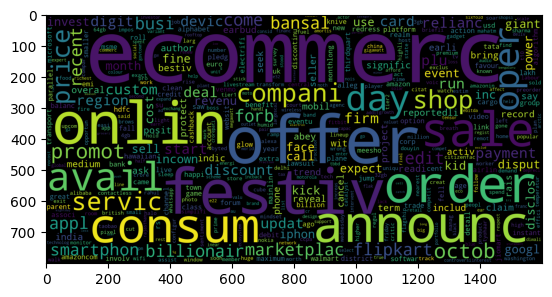

In [23]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(wdlist))
plt.imshow(wc)